In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Preparing Data

In [57]:
df = pd.read_csv(f'weatherkit_plus_load.csv')
colors = sns.color_palette()

In [58]:
#setting the dataframe index to timestampt
df = df.set_index('event_timestamp')

In [59]:
#converting object type to datetime
df.index = pd.to_datetime(df.index)

In [60]:
#Removing the initial text from column name
df.columns = df.columns.str.strip('weatherkit_')

In [61]:
ar_df = df.copy()

In [62]:
df.head(10)

,observed_temperature_C,observed_humidity_pc,observed_air_pressure_kP,observed_cloud_cover_pc,observed_wind_direction_deg,observed_wind_speed_km,forecast_temp_C,forecast_humidity_pc,forecast_air_pressure_kP,forecast_cloud_cover_pc,forecast_wind_direction_deg,forecast_wind_speed_km,load_MW
event_timestamp,,,,,,,,,,,,,
2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088
2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132
2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780
2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308
2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376
2023-02-11 01:45:00+05:30,21.66,71.0,101.313,0.0,10.0,7.07,21.35,73.0,101.334,0.0,6.0,7.37,242.830688
2023-02-11 02:00:00+05:30,21.53,71.0,101.304,0.0,12.0,7.06,21.35,73.0,101.334,0.0,6.0,7.37,240.197572
2023-02-11 02:15:00+05:30,21.39,71.0,101.295,0.0,13.0,7.06,21.35,73.0,101.334,0.0,6.0,7.37,238.021056
2023-02-11 02:30:00+05:30,21.25,72.0,101.287,0.0,15.0,7.04,20.86,74.0,101.292,0.0,14.0,7.33,236.483380


In [63]:
#Checking for any missing values
print(len(df))
print(df.isnull().values.sum())
df.describe()

14298
0


,observed_temperature_C,observed_humidity_pc,observed_air_pressure_kP,observed_cloud_cover_pc,observed_wind_direction_deg,observed_wind_speed_km,forecast_temp_C,forecast_humidity_pc,forecast_air_pressure_kP,forecast_cloud_cover_pc,forecast_wind_direction_deg,forecast_wind_speed_km,load_MW
count,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000
mean,28.877266,67.243768,100.902437,33.470323,218.261505,11.394937,28.810426,67.022262,100.893322,32.690287,217.872849,11.474569,372.500217
std,3.480119,16.161825,0.321955,30.138515,106.989811,6.103925,3.479793,16.255389,0.315788,29.219298,105.033661,6.068993,88.323996
min,18.470000,21.000000,99.866000,0.000000,0.000000,1.730000,18.100000,20.000000,99.964000,0.000000,0.000000,1.450000,214.677424
25%,26.530000,56.999000,100.681000,9.000000,173.000000,6.270000,26.440000,56.999000,100.676000,10.000000,171.000000,6.360000,301.146656
50%,28.740000,70.000000,100.915500,24.000000,251.000000,9.970000,28.640000,70.000000,100.907000,24.000000,249.000000,10.180000,356.875968
75%,31.410000,80.000000,101.117000,52.000000,297.000000,16.040000,31.350000,80.000000,101.108000,48.000000,295.000000,16.340000,439.639653
max,38.390000,95.000000,101.760000,99.000000,359.000000,35.200000,37.580000,95.000000,101.713000,99.000000,359.000000,32.990000,1543.524320


# Data Analysis and Feature Engineering

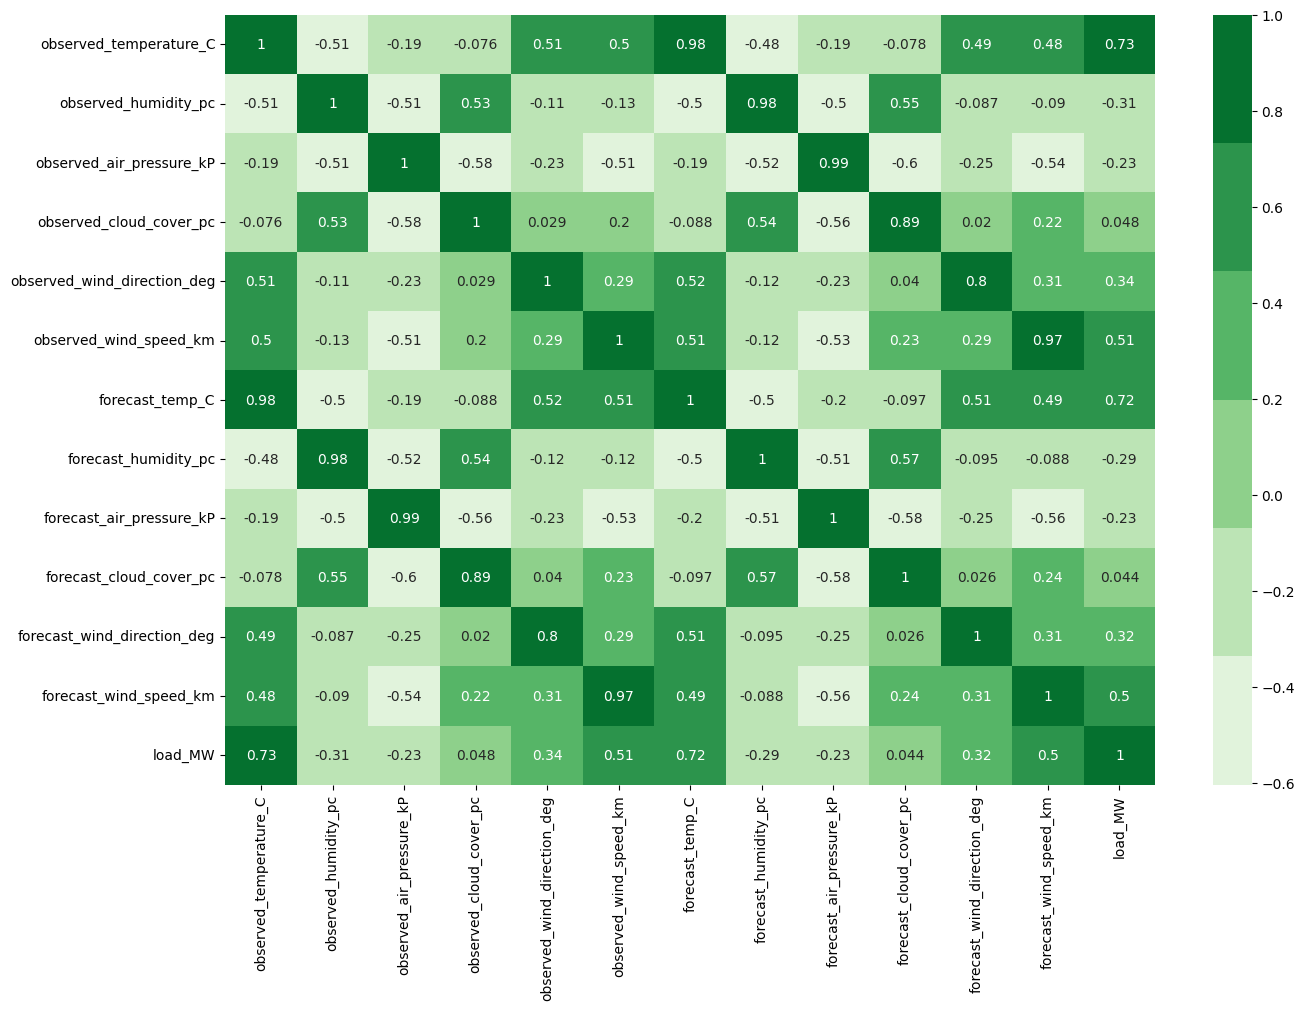

In [64]:
#correlation between features
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, annot=True, cmap=sns.color_palette('Greens'))

The heatmap shows minimal correlation between the target and cloud cover.  
The key attributes are temperature and windspeed.  
There is also a high correlation between the observed values and the forecasted.

In [65]:
#Only using forecasted values and not observed and dropping cloud_cover
cols = list(df.columns)
df = df[cols[6:]]
df.drop(['forecast_cloud_cover_pc'], axis=1, inplace=True)
lstm_df = df.copy()

In [66]:
df.isnull().any().any()

False

<Axes: title={'center': 'Load'}, xlabel='event_timestamp'>

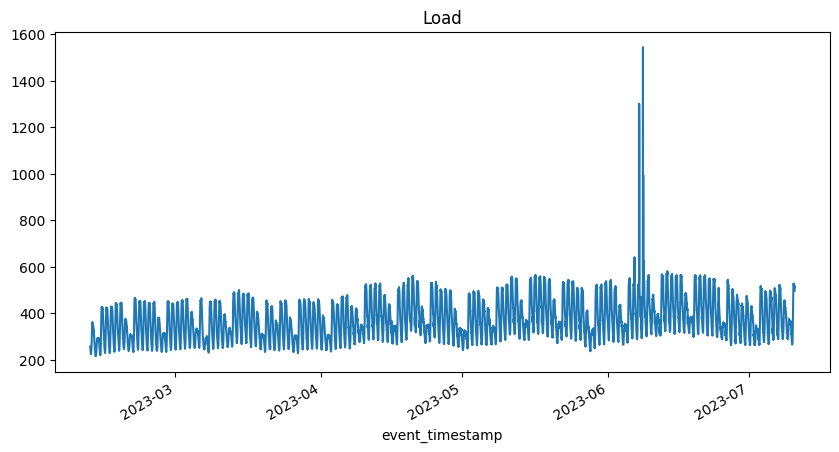

In [67]:
#Visualizing the target variable
df['load_MW'].plot(color=colors[0], figsize=(10,5), title='Load')

Seasonality is observed with repeating patterns  
Further exploring days and weeks.

<Axes: title={'center': 'Load for one day'}, xlabel='event_timestamp'>

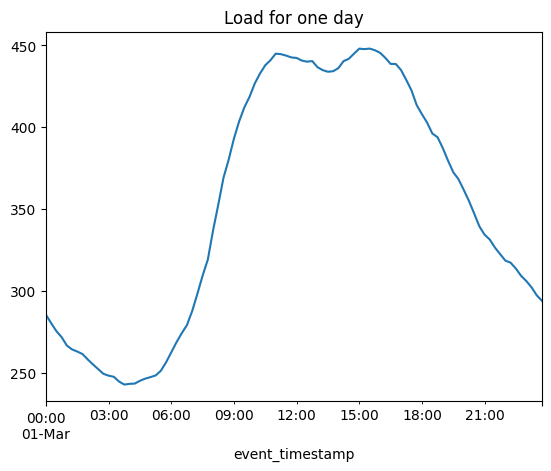

In [68]:
day = df.loc[(df.index >= '2023-03-01 00:00:00+5:30') & (df.index < '2023-03-02 00:00:00+5:30'), 'load_MW']
day.plot(title='Load for one day')

<Axes: title={'center': 'Load for two weeks'}, xlabel='event_timestamp'>

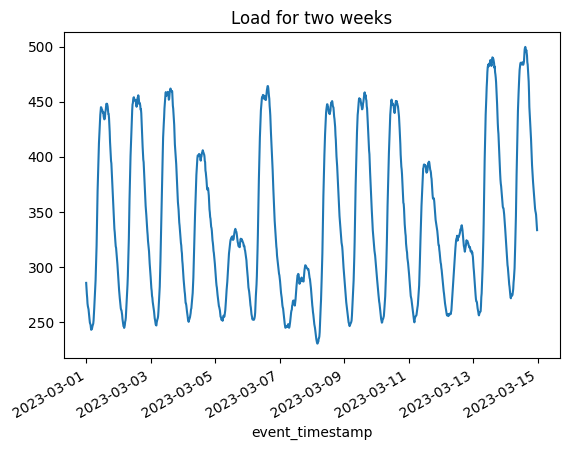

In [69]:
week = df.loc[(df.index >= '2023-03-01 00:00:00+5:30') & (df.index < '2023-03-15 00:00:00+5:30'), 'load_MW']
week.plot(title='Load for two weeks')

In [70]:
#Adding Load from 48 hours ago and 7 days ago (same day) at the same time
df['PrevDay'] = df['load_MW'].shift(freq='2D')
df['PrevWeek'] = df['load_MW'].shift(freq='7D')
df.dropna(inplace=True)

Day of the week and Hour of the day seem to have effect on the load

In [71]:
#Creating new features
df['Hour'] = df.index.hour
df['Day'] = df.index.dayofweek

# Model Selection

In [72]:
X = df.drop(['load_MW'], axis=1)
y = df['load_MW']

In [73]:
#Train-Test Split
train_size = int(0.8*len(df))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

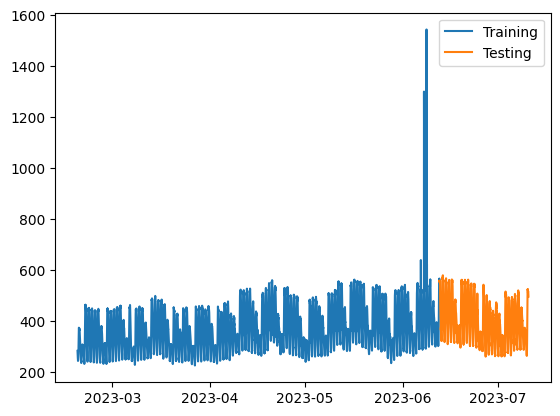

In [74]:
fig, ax = plt.subplots()
train = ax.plot(y_train, label='Training')
test = ax.plot(y_test, label='Testing')
plt.legend()
plt.show()

### Using Regression for Predictions

In [75]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [76]:
model = xgb.XGBRegressor(n_estimators=500, early_stopping_rounds=100, learning_rate=0.01, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)
preds = model.predict(X_test)
mse_score = mean_squared_error(preds, y_test)
mape_score = mean_absolute_percentage_error(preds, y_test)

[0]	validation_0-rmse:86.97643	validation_1-rmse:91.52750
[100]	validation_0-rmse:39.69265	validation_1-rmse:45.93821
[200]	validation_0-rmse:24.26865	validation_1-rmse:34.40357
[300]	validation_0-rmse:18.83555	validation_1-rmse:32.41467
[400]	validation_0-rmse:15.96740	validation_1-rmse:32.68325
[448]	validation_0-rmse:14.99807	validation_1-rmse:32.47559


In [77]:
print('Mean Squared Error: ', mse_score)
print("RMSE: ", np.sqrt(mse_score))

Mean Squared Error:  1021.7605679803081
RMSE:  31.964989722825003


In [78]:
print('Mean Absolute Percentage Error: ', mape_score)

Mean Absolute Percentage Error:  0.06228469772452729


Feature Importance Analysis

In [79]:
importances = dict(zip(model.feature_names_in_,model.feature_importances_))
imps = df.from_dict(importances, orient='index', columns=['Score'])

In [80]:
imps.sort_values(['Score'])

,Score
forecast_wind_speed_km,0.013267
forecast_air_pressure_kP,0.013661
forecast_wind_direction_deg,0.013734
forecast_humidity_pc,0.020656
Hour,0.025629
Day,0.031125
forecast_temp_C,0.045372
PrevDay,0.091472
PrevWeek,0.745084


Plotting Predicted vs. Real Values

In [81]:
x = np.arange(len(preds))

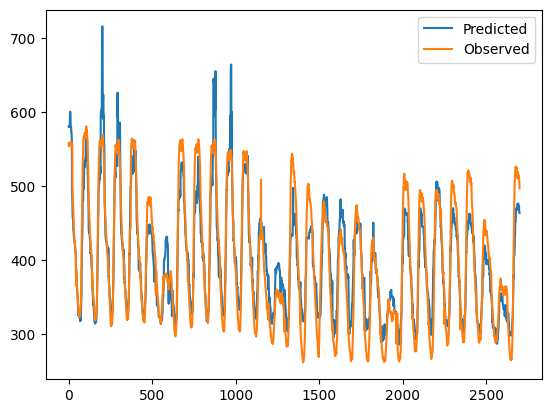

In [82]:
fig, ax = plt.subplots()
ax.plot(x, preds, label='Predicted')
ax.plot(x, y_test, label='Observed')
plt.legend()
plt.show()

# Using LSTMs for comparison to Regressor

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [84]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
np.random.seed(42)

In [85]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [86]:
scaler = MinMaxScaler()

In [87]:
df.head()

,forecast_temp_C,forecast_humidity_pc,forecast_air_pressure_kP,forecast_wind_direction_deg,forecast_wind_speed_km,load_MW,PrevDay,PrevWeek,Hour,Day
event_timestamp,,,,,,,,,,
2023-02-18 00:30:00+05:30,25.33,42.0,101.204,39.0,7.60,284.676756,266.299720,256.024088,0,5
2023-02-18 00:45:00+05:30,25.33,42.0,101.204,39.0,7.60,280.063324,262.751976,251.899132,0,5
2023-02-18 01:00:00+05:30,25.33,42.0,101.204,39.0,7.60,276.169996,258.501784,248.695780,1,5
2023-02-18 01:15:00+05:30,25.33,42.0,101.204,39.0,7.60,273.667292,254.857032,245.879308,1,5
2023-02-18 01:30:00+05:30,24.42,43.0,101.164,48.0,7.65,269.280432,252.261184,243.583376,1,5


In [88]:
lstmdf = df.copy()
lstmdf = lstmdf.iloc[:, [0,1,2,3,4,6,7,8,5]] #Rearranging DF
train_size = int(0.8*len(lstmdf))
train_df = lstmdf.iloc[:train_size]
test_df = lstmdf.iloc[train_size:]
train_df = scaler.fit_transform(train_df)
test_df = scaler.transform(test_df)
X_train = train_df[:,:-1]
y_train = train_df[:,-1]
X_test = test_df[:,:-1]
y_test = test_df[:, -1]

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10793, 8)
(2699, 8)
(10793,)
(2699,)


In [90]:
#Creating Sequences for the Model
window = 96 #To generate next day load only based on forecasted values and historic values
X, y = [], []
for i in range(len(X_train) - window):
    X.append(X_train[i:i+window])
    y.append(y_train[i:i+window])

Xt, yt = [], []
for i in range(len(X_test) - window):
    Xt.append(X_test[i:i+window])
    yt.append(y_test[i:i+window])
X = torch.tensor(np.array(X), dtype=torch.float32)
y = torch.tensor(np.array(y), dtype=torch.float32)
Xt = torch.tensor(np.array(Xt), dtype=torch.float32)
yt = torch.tensor(np.array(yt), dtype=torch.float32)
print(X.shape, y.shape)
print(Xt.shape, yt.shape)

torch.Size([10697, 96, 8]) torch.Size([10697, 96])
torch.Size([2603, 96, 8]) torch.Size([2603, 96])


In [91]:
#Preparing the torch dataset
train_dataset = TensorDataset(X, y)
test_dataset = TensorDataset(Xt, yt)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=8, num_layers=2, hidden_size=128, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(128, 96)
    def forward(self, x):
        x, (hstate, cstate) = self.lstm(x)
        #Could also consider Mean Pooling (e.g. x = torch.mean(x, dim=1)) instead of only extracting hidden states from the last time step.
        out = self.fc(x[:,-1,:])
        return out

In [93]:
model = LSTM()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5)
epochs = 20

In [94]:
train_loss, test_loss = [], []
for epoch in tqdm(range(epochs), leave=True):
    running_loss = 0.0
    model.train()
    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device)
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item() * X.shape[0]
    train_loss.append(running_loss)
    print('Training Loss: {}'.format(running_loss))
    model.eval()
    with torch.no_grad():
        running_loss = 0.0
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)
            preds = model(X)
            loss = criterion(preds, y)
            running_loss += loss.item() * X.shape[0]
        scheduler.step(running_loss)
        test_loss.append(running_loss)
        print('Validation Loss: {}'.format(running_loss))

  5%|▌         | 1/20 [00:00<00:17,  1.11it/s]

Training Loss: 22.254072394687682
Validation Loss: 1.914706360315904


 10%|█         | 2/20 [00:01<00:15,  1.18it/s]

Training Loss: 10.306903963442892
Validation Loss: 1.9864667446818203


 15%|█▌        | 3/20 [00:02<00:13,  1.22it/s]

Training Loss: 8.520566569990478
Validation Loss: 1.7088848374551162


 20%|██        | 4/20 [00:03<00:12,  1.27it/s]

Training Loss: 7.639006001409143
Validation Loss: 1.6542201754637063


 25%|██▌       | 5/20 [00:03<00:11,  1.31it/s]

Training Loss: 7.391772965784185
Validation Loss: 1.8397615387220867


 30%|███       | 6/20 [00:04<00:10,  1.31it/s]

Training Loss: 6.816336283460259
Validation Loss: 1.3232603867072612


 35%|███▌      | 7/20 [00:05<00:09,  1.31it/s]

Training Loss: 6.727254031924531
Validation Loss: 1.5454541061189957


 40%|████      | 8/20 [00:06<00:09,  1.31it/s]

Training Loss: 6.418631850101519
Validation Loss: 1.832235766283702


 45%|████▌     | 9/20 [00:06<00:08,  1.31it/s]

Training Loss: 6.0143595861736685
Validation Loss: 1.4369923386257142


 50%|█████     | 10/20 [00:07<00:07,  1.31it/s]

Training Loss: 5.621826191942091
Validation Loss: 1.341420415788889


 55%|█████▌    | 11/20 [00:08<00:06,  1.31it/s]

Training Loss: 5.6476056050742045
Validation Loss: 1.896694908151403


 60%|██████    | 12/20 [00:09<00:06,  1.31it/s]

Training Loss: 5.291959003545344
Validation Loss: 1.3251475914148614


 65%|██████▌   | 13/20 [00:10<00:05,  1.30it/s]

Training Loss: 4.414882444543764
Validation Loss: 1.420622454606928


 70%|███████   | 14/20 [00:10<00:04,  1.31it/s]

Training Loss: 4.149879841483198
Validation Loss: 1.4785376174841076


 75%|███████▌  | 15/20 [00:11<00:03,  1.31it/s]

Training Loss: 4.014561036783562
Validation Loss: 1.6369376132497564


 80%|████████  | 16/20 [00:12<00:03,  1.31it/s]

Training Loss: 3.773572674850584
Validation Loss: 1.6913739459123462


 85%|████████▌ | 17/20 [00:13<00:02,  1.31it/s]

Training Loss: 3.651273111696355
Validation Loss: 1.8333081441232935


 90%|█████████ | 18/20 [00:13<00:01,  1.31it/s]

Training Loss: 3.593791912411689
Validation Loss: 1.854181918897666


 95%|█████████▌| 19/20 [00:14<00:00,  1.32it/s]

Training Loss: 3.4539558215037687
Validation Loss: 1.8084133976371959


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]

Training Loss: 3.4267134364927188
Validation Loss: 1.8066331923473626


In [95]:
predicted, observed = [], []
model.eval()
with torch.no_grad():
    for i in range(0, len(Xt), 96):
        sequence = Xt[i].unsqueeze(0).to(device)            #Changing 2D to 3D for LSTM
        preds = model(sequence).cpu().numpy().flatten()
        predicted.append(preds)
        observed.append(yt[i].cpu().numpy().flatten())


In [120]:
Xt.shape

torch.Size([2411, 160, 6])

In [96]:
#Inverting the scaler to get the real values
predicted = np.array(predicted).flatten()
observed = np.array(observed).flatten()
dummy = np.zeros((predicted.shape[0], Xt.shape[2])) #Dummy columns to match the shape for the scaler
print(dummy.shape)
predicted = scaler.inverse_transform(np.concatenate([dummy, predicted.reshape(-1,1)], axis=1))
observed = scaler.inverse_transform(np.concatenate([dummy, observed.reshape(-1,1)], axis=1))

(2688, 8)


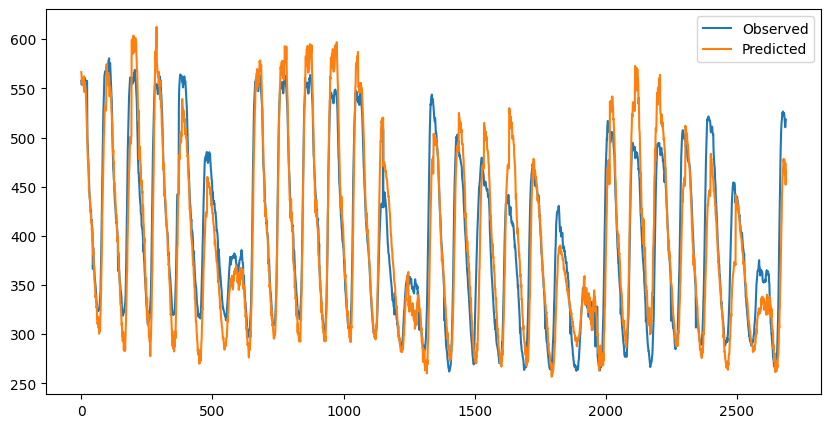

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(observed[:,-1], label='Observed')
ax.plot(predicted[:,-1], label='Predicted')
plt.legend()
plt.show()

In [98]:
MSE = mean_squared_error(observed[:,-1], predicted[:,-1])
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(observed[:,-1], predicted[:,-1])
print(MSE, RMSE, MAPE)

1310.4166598841223 36.1996776212734 0.06783091883664645


# Using LSTMs for Predictions (Future Prediction)

Data Preparation

In [99]:
#Train-Test Split and scaling
scaler = MinMaxScaler()
lstm_df['PrevWeek'] = lstm_df['load_MW'].shift(freq='6D')   #adding the reading from the same day last week
lstm_df.dropna(inplace=True)
lstm_df = lstm_df.iloc[:, [0,1,2,3,4,6,5]]
train_size = int(0.8*len(lstm_df))
train_df = lstm_df.iloc[:train_size]
test_df = lstm_df.iloc[train_size:]
train_df = scaler.fit_transform(train_df)
test_df = scaler.transform(test_df)
X_train = train_df[:,:-1]
y_train = train_df[:,-1]
X_test = test_df[:,:-1]
y_test = test_df[:, -1]


In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10922, 6)
(2731, 6)
(10922,)
(2731,)


In [101]:
#Creating Sequences for the Model
window = 160 #To generate next day load plus today's load after 8:00AM
X, y = [], []
for i in range(len(X_train) - (window*2)):
    X.append(X_train[i:i+window])
    y.append(y_train[i+window:i+window+window])

Xt, yt = [], []
for i in range(len(X_test) - (window*2)):
    Xt.append(X_test[i:i+window])
    yt.append(y_test[i+window:i+window+window])
X = torch.tensor(np.array(X), dtype=torch.float32)
y = torch.tensor(np.array(y), dtype=torch.float32)
Xt = torch.tensor(np.array(Xt), dtype=torch.float32)
yt = torch.tensor(np.array(yt), dtype=torch.float32)
print(X.shape, y.shape)
print(Xt.shape, yt.shape)

torch.Size([10602, 160, 6]) torch.Size([10602, 160])
torch.Size([2411, 160, 6]) torch.Size([2411, 160])


In [102]:
#Preparing the torch dataset
train_dataset = TensorDataset(X, y)
test_dataset = TensorDataset(Xt, yt)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [103]:
len(train_dataset)

10602

Defining Model

In [104]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=6, num_layers=2, hidden_size=128, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(128, 160)
    def forward(self, x):
        x, (hstate, cstate) = self.lstm(x)
        out = self.fc(x[:,-1,:])
        return out

In [105]:
model = LSTM()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5)
epochs = 20

Training the model

In [106]:
train_loss, test_loss = [], []
for epoch in tqdm(range(epochs), leave=True):
    running_loss = 0.0
    model.train()
    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device)
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item() * X.shape[0]
    train_loss.append(running_loss)
    print('Training Loss: {}'.format(running_loss))
    model.eval()
    with torch.no_grad():
        running_loss = 0.0
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)
            preds = model(X)
            loss = criterion(preds, y)
            running_loss += loss.item() * X.shape[0]
        scheduler.step(running_loss)
        test_loss.append(running_loss)
        print('Validation Loss: {}'.format(running_loss))

  5%|▌         | 1/20 [00:01<00:19,  1.04s/it]

Training Loss: 25.571120099863037
Validation Loss: 3.43531661760062


 10%|█         | 2/20 [00:02<00:18,  1.04s/it]

Training Loss: 12.992005828535184
Validation Loss: 2.5418748140800744


 15%|█▌        | 3/20 [00:03<00:17,  1.04s/it]

Training Loss: 11.563907388597727
Validation Loss: 2.1173861117567867


 20%|██        | 4/20 [00:04<00:16,  1.04s/it]

Training Loss: 10.586752070114017
Validation Loss: 3.028610701672733


 25%|██▌       | 5/20 [00:05<00:15,  1.04s/it]

Training Loss: 9.257488796953112
Validation Loss: 3.13001922366675


 30%|███       | 6/20 [00:06<00:14,  1.04s/it]

Training Loss: 8.467500118771568
Validation Loss: 2.3875824798014946


 35%|███▌      | 7/20 [00:07<00:13,  1.04s/it]

Training Loss: 10.411164974560961
Validation Loss: 2.9860117030330002


 40%|████      | 8/20 [00:08<00:12,  1.05s/it]

Training Loss: 8.873959523625672
Validation Loss: 3.503401515772566


 45%|████▌     | 9/20 [00:09<00:11,  1.05s/it]

Training Loss: 9.375418256036937
Validation Loss: 6.338018890004605


 50%|█████     | 10/20 [00:10<00:10,  1.05s/it]

Training Loss: 6.89935338543728
Validation Loss: 5.056699462933466


 55%|█████▌    | 11/20 [00:11<00:09,  1.05s/it]

Training Loss: 6.581694640975911
Validation Loss: 5.581804650602862


 60%|██████    | 12/20 [00:12<00:08,  1.05s/it]

Training Loss: 6.387015955115203
Validation Loss: 6.3430700222961605


 65%|██████▌   | 13/20 [00:13<00:07,  1.05s/it]

Training Loss: 6.171919581247494
Validation Loss: 6.088623416610062


 70%|███████   | 14/20 [00:14<00:06,  1.05s/it]

Training Loss: 6.08937647100538
Validation Loss: 6.614015795756131


 75%|███████▌  | 15/20 [00:15<00:05,  1.05s/it]

Training Loss: 6.004983886377886
Validation Loss: 6.5303441600408405


 80%|████████  | 16/20 [00:16<00:04,  1.05s/it]

Training Loss: 5.823539202858228
Validation Loss: 6.949679809622467


 85%|████████▌ | 17/20 [00:17<00:03,  1.05s/it]

Training Loss: 5.789641062263399
Validation Loss: 7.069356374442577


 90%|█████████ | 18/20 [00:18<00:02,  1.06s/it]

Training Loss: 5.785109765827656
Validation Loss: 7.132711039856076


 95%|█████████▌| 19/20 [00:19<00:01,  1.06s/it]

Training Loss: 5.756810985243646
Validation Loss: 7.114873089827597


100%|██████████| 20/20 [00:21<00:00,  1.05s/it]

Training Loss: 5.754312229750212
Validation Loss: 7.100889601744711


Making Predictions on the test set

In [107]:
predicted, observed = [], []
model.eval()
with torch.no_grad():
    for i in range(0, len(Xt), 160):
        sequence = Xt[i].unsqueeze(0).to(device)            #Changing 2D to 3D for LSTM
        preds = model(sequence).cpu().numpy().flatten()
        predicted.append(preds)
        observed.append(yt[i].cpu().numpy().flatten())


In [108]:
#Inverting the scaler to get the real values
predicted = np.array(predicted).flatten()
observed = np.array(observed).flatten()
dummy = np.zeros((predicted.shape[0], Xt.shape[2])) #Dummy columns to match the shape for the scaler
print(dummy.shape)
predicted = scaler.inverse_transform(np.concatenate([dummy, predicted.reshape(-1,1)], axis=1))
observed = scaler.inverse_transform(np.concatenate([dummy, observed.reshape(-1,1)], axis=1))

(2560, 6)


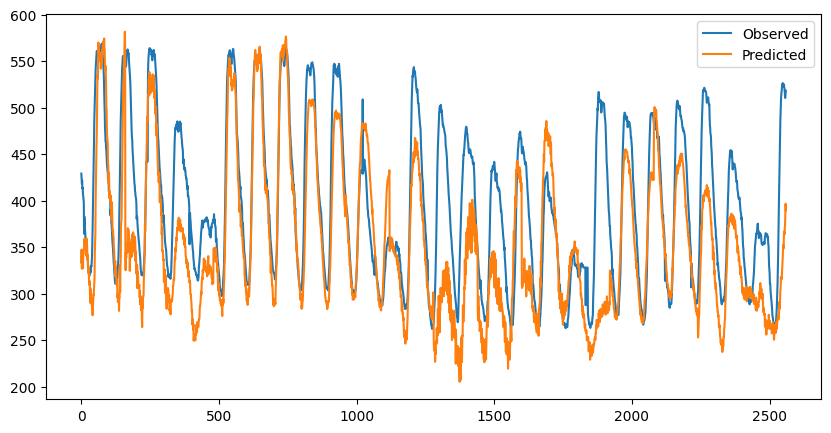

In [109]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(observed[:,-1], label='Observed')
ax.plot(predicted[:,-1], label='Predicted')
plt.legend()
plt.show()

In [110]:
MSE = mean_squared_error(observed[:,-1], predicted[:,-1])
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(observed[:,-1], predicted[:,-1])
print(MSE, RMSE, MAPE)

4675.072447182541 68.37450144010222 0.12024668264092524


### Using ARIMA for Time-Series Forecasting

In [111]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima

In [112]:
#Skipping the first day as it did not have values starting from 00:00:00
timeseries = ar_df.loc[(ar_df.index >= '2023-02-12'), 'load_MW']

In [113]:
#Checking for stationarity using the ADF Test
results = adfuller(timeseries)
print('ADF: ', results[0])
print('P-value: ', results[1]) #The p-value is very small, i.e., smaller than 5% so no stationarity

ADF:  -16.216433776870876
P-value:  3.938121056311996e-29


In [114]:
timeseries
train_size = int(0.8*len(timeseries))
train = timeseries.iloc[:train_size]
test = timeseries.iloc[train_size:]

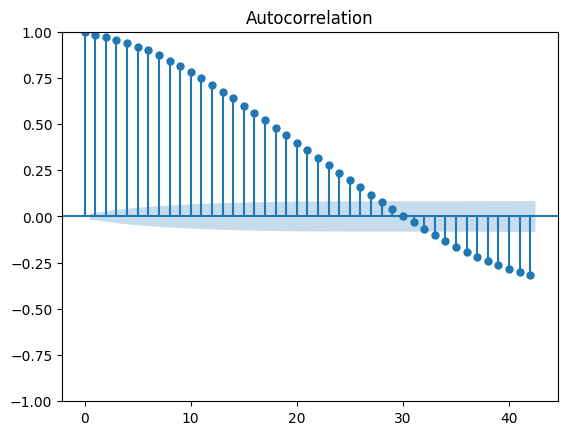

In [115]:
acf = plot_acf(timeseries) #Shows gradual decay and no sharp cut-off

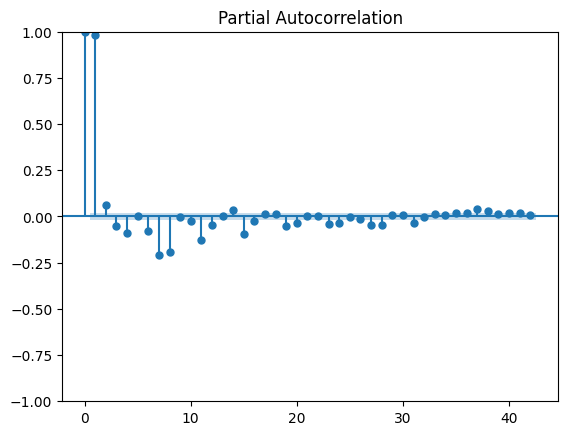

In [116]:
pacf = plot_pacf(timeseries) #Shows a strong cutoff after 2

Automatically finding the best model parameters for ARIMA was not feasible

In [117]:
#params = pmdarima.auto_arima(train, d=0, stepwise=True, trace=True, max_order=6, suppress_warnings=True)

In [118]:
%%capture
#Using an autoregressive based model based on the previous plots
model = ARIMA(train, order=(5,1,1))
result = model.fit()

In [119]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                load_MW   No. Observations:                11363
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -48202.814
Date:                Mon, 10 Mar 2025   AIC                          96419.629
Time:                        16:21:41   BIC                          96470.995
Sample:                             0   HQIC                         96436.906
                              - 11363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6435      0.006    107.593      0.000       0.632       0.655
ar.L2          0.0816      0.001     70.180      0.000       0.079       0.084
ar.L3          0.0325      0.002     15.970      0.0